# Assignment: Evaluating Data from a Form

A client has been testing a [small form](index.html) to gather some basic data about their client-base. They have brought their findings to you to validate the data they have gathered. You can open the `index.html` page in a browser to take a look at the form.

You have been provided a [dataset of csv records](../../data/form.csv) that contain entries from the form as well as some basic visualizations.The client pointed out that some of the visualizations look incorrect but they're unsure about how to resolve them. You can explore it in the [assignment notebook](assignment.ipynb).

## Instructions

Use the techniques in this lesson to make recommendations about the form so it captures accurate and consistent information. 

In [2]:
%pip install pandas
%pip install matplotlib


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.1/159.1 kB 360.6 kB/s eta 0:00:001m383.3 kB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 352.1 kB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.4/313.4 kB 515.2 kB/s eta 0:00:001m508.0 kB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 684.3 kB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 1.1 MB/s eta 0:00:000:00:010:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 1.7 MB/s eta 0:00:00m eta 0:00:010:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.1/103.1 kB 1.8 MB/s eta 0:00:0031m1.9 MB/s eta 0:00:01

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python3.11 -m pip instal

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Loading the dataset
form_df = pd.read_csv("form.csv")
print(form_df)




  birth_month       state   pet
0     January         NaN  Cats
1         JAN          CA  Cats
2        Sept      Hawaii   Dog
3     january          AK   Dog
4        July          RI  Cats
5   September  California  Cats
6       April          CA   Dog
7     January  California  Cats
8    November          FL   Dog
9    December     Florida  Cats


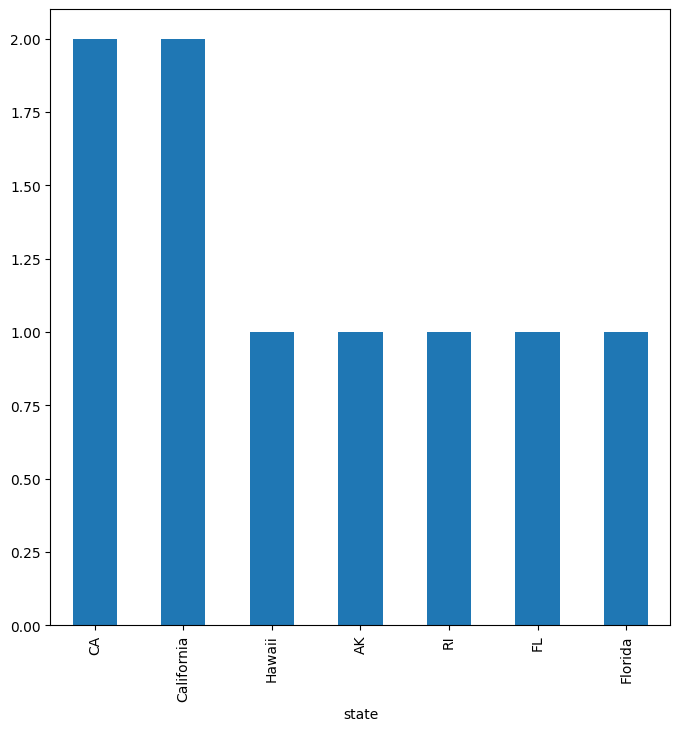

In [9]:
form_df['state'].value_counts().plot(kind='bar', figsize=(8,8));
plt.show()

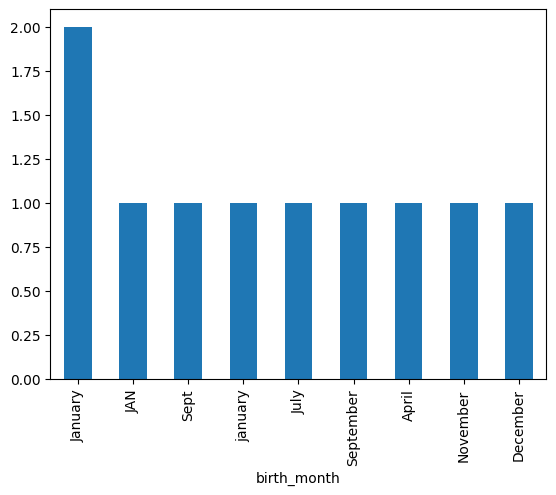

In [4]:
form_df['birth_month'].value_counts().plot(kind='bar');
plt.show()

# Solutions:
# Recommendations

### 1. Standardize Input:

In [10]:
# Import all the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
# Loading the dataset
form_df = pd.read_csv("form.csv")
print(form_df)


  birth_month       state   pet
0     January         NaN  Cats
1         JAN          CA  Cats
2        Sept      Hawaii   Dog
3     january          AK   Dog
4        July          RI  Cats
5   September  California  Cats
6       April          CA   Dog
7     January  California  Cats
8    November          FL   Dog
9    December     Florida  Cats


In [22]:
# See the five entries
form_df.head()

,birth_month,state,pet
0,January,NaN,Cats
1,JAN,CA,Cats
2,Sept,Hawaii,Dog
3,january,AK,Dog
4,July,RI,Cats


In [23]:
# See the last five entries
form_df.tail()

,birth_month,state,pet
5,September,California,Cats
6,April,CA,Dog
7,January,California,Cats
8,November,FL,Dog
9,December,Florida,Cats


In [24]:
form_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   birth_month  10 non-null     object
 1   state        9 non-null      object
 2   pet          10 non-null     object
dtypes: object(3)
memory usage: 368.0+ bytes


#### 2. Convert all state abbreviations to full names

In [25]:
# Converting all the state names abbreviations to full name
full_name = {"CA": "California", "AK": "Alaska", "RI": "Rhode Island", "FL": "Florida"}
form_df['state'] = form_df['state'].map(full_name).fillna(form_df['state'])

In [26]:
print(form_df)

  birth_month         state   pet
0     January           NaN  Cats
1         JAN    California  Cats
2        Sept        Hawaii   Dog
3     january        Alaska   Dog
4        July  Rhode Island  Cats
5   September    California  Cats
6       April    California   Dog
7     January    California  Cats
8    November       Florida   Dog
9    December       Florida  Cats



#### 3. Convert all months abbreviations to full names

In [31]:
# Converting to title Case
form_df['birth_month'] = form_df['birth_month'].str.title()

# Converting all the months abbreviations to full name
months = {'Jan': 'January', 'Feb': 'February', 'Mar': 'March', 'Apr': 'April', 'May': 'May', 'Jun': 'June', 'Jul': 'July', 'Aug': 'August', 'Sep': 'September', 'Oct': 'October', 'Nov': 'November', 'Dec': 'December'}
months['birth_month'] = form_df['birth_month'].map(months).fillna(form_df['birth_month'])


In [32]:
print(form_df)

  birth_month         state   pet
1         Jan    California  Cats
2        Sept        Hawaii   Dog
3     January        Alaska   Dog
4        July  Rhode Island  Cats
5   September    California  Cats
6       April    California   Dog
7     January    California  Cats
8    November       Florida   Dog
9    December       Florida  Cats


### 4. Handle missing value

In [29]:
# Drop rows with NaN values
form_df = form_df.dropna(subset=['state'])

In [30]:
print(form_df)

  birth_month         state   pet
1         Jan    California  Cats
2        Sept        Hawaii   Dog
3     January        Alaska   Dog
4        July  Rhode Island  Cats
5   September    California  Cats
6       April    California   Dog
7     January    California  Cats
8    November       Florida   Dog
9    December       Florida  Cats


### 5.  Re-plot Visualizations

###  Visualize counts of states

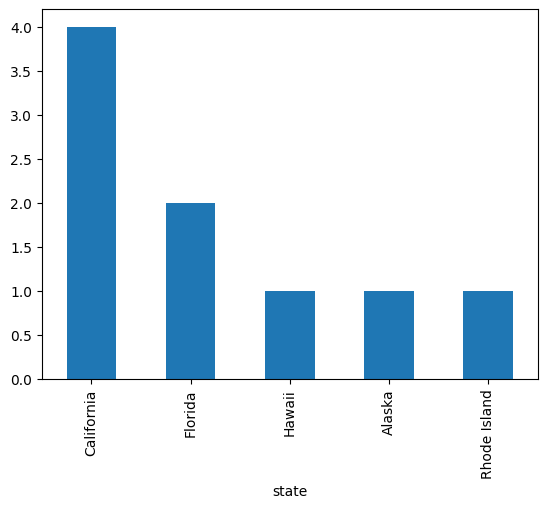

In [33]:
form_df['state'].value_counts().plot(kind='bar')
plt.show()

### Visualize counts of birth months

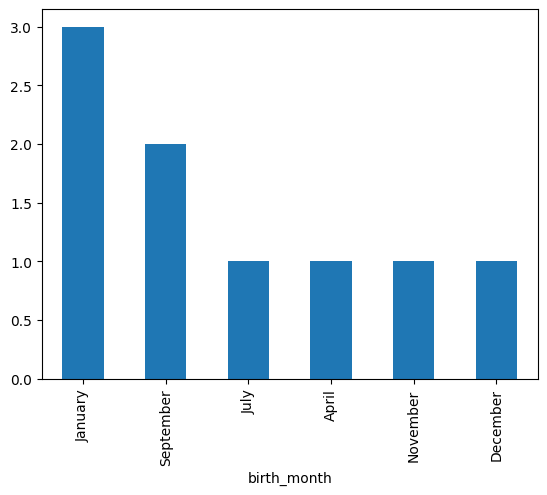

In [37]:
form_df['birth_month'].value_counts().plot(kind='bar')
plt.show()